In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install openpyxl



### Electric Supply Features and Their Relationships

1. **SERIAL**
   - **Description**: Unique identifier for each record.
   - **Relation**: Connects to all features, serving as a reference for each entry.

2. **CUSTOMER_REF**
   - **Description**: Reference number for each customer account.
   - **Relation**: Links records to specific customers, providing context for all measurements related to them.

3. **TIMESTAMP**
   - **Description**: Date and time when the data was recorded.
   - **Relation**: Works with DATE and TIME for temporal context, essential for analyzing trends over time.

4. **OBIS**
   - **Description**: Codes used to identify specific measurements in metering.
   - **Relation**: Categorizes data points, helping to interpret various measurements.

5. **DATE**
   - **Description**: The date of the recorded data.
   - **Relation**: Complements TIMESTAMP and TIME to establish when measurements occurred.

6. **TIME**
   - **Description**: The time of the recorded data.
   - **Relation**: Works with DATE and TIMESTAMP for precise tracking of energy usage.

7. **AVG. IMPORT KW (kW)**
   - **Description**: Average power consumed by the customer.
   - **Relation**: Linked to IMPORT KWH, indicating average consumption over time and influencing power factor calculations.

8. **IMPORT KWH (kWh)**
   - **Description**: Total energy consumed over a specific period.
   - **Relation**: Related to AVG. IMPORT KW as it reflects cumulative consumption.

9. **AVG. EXPORT KW (kW)**
   - **Description**: Average power exported back to the grid.
   - **Relation**: Provides a comparison to AVG. IMPORT KW, helping determine net energy usage.

10. **EXPORT KWH (kWh)**
    - **Description**: Total energy exported over a specific period.
    - **Relation**: Similar to IMPORT KWH; informs about customer generation capacity.

11. **AVG. IMPORT KVA (kVA)**
    - **Description**: Average apparent power consumed.
    - **Relation**: Combines with AVG. IMPORT KW to assess total load and influence power factor.

12. **AVG. EXPORT KVA (kVA)**
    - **Description**: Average apparent power exported.
    - **Relation**: Provides insights into the efficiency of energy exported.

13. **PHASE A INST. CURRENT (A)**
    - **Description**: Instantaneous current in Phase A.
    - **Relation**: Connects with PHASE A INST. VOLTAGE to calculate active power and influence power factor.

14. **PHASE A INST. VOLTAGE (V)**
    - **Description**: Instantaneous voltage in Phase A.
    - **Relation**: Works with PHASE A INST. CURRENT to determine power consumption.

15. **INST. POWER FACTOR**
    - **Description**: Efficiency of the electric system.
    - **Relation**: Derived from current and voltage measurements, indicating how effectively power is used.

16. **IMPORT KVARH (kvarh)**
    - **Description**: Total reactive energy consumed.
    - **Relation**: Relates to overall power factor and energy efficiency, affecting billing.

17. **EXPORT KVARH (kvarh)**
    - **Description**: Total reactive energy exported.
    - **Relation**: Similar to IMPORT KVARH; informs about reactive power dynamics.

18. **PHASE B INST. CURRENT (A)**
    - **Description**: Instantaneous current in Phase B.
    - **Relation**: Related to PHASE B INST. VOLTAGE for power calculations.

19. **PHASE C INST. CURRENT (A)**
    - **Description**: Instantaneous current in Phase C.
    - **Relation**: Complements currents from Phases A and B for total load calculations.

20. **PHASE B INST. VOLTAGE (V)**
    - **Description**: Instantaneous voltage in Phase B.
    - **Relation**: Works with PHASE B INST. CURRENT for calculating power metrics.

21. **PHASE C INST. VOLTAGE (V)**
    - **Description**: Instantaneous voltage in Phase C.
    - **Relation**: Complements PHASE C INST. CURRENT for power quality assessments.

22. **POWER FACTOR**
    - **Description**: Overall efficiency of the system.
    - **Relation**: Influenced by all current and voltage measurements across phases.

23. **AVG. CURRENT (V)**
    - **Description**: Average current across all phases.
    - **Relation**: Aids in power calculations and overall efficiency assessments.

24. **AVG. VOLTAGE (V)**
    - **Description**: Average voltage supplied to the customer.
    - **Relation**: Works with AVG. CURRENT to provide average power quality metrics.

### Summary of Feature Relationships
- **Energy Dynamics**: Features like AVG. IMPORT KW, IMPORT KWH, AVG. EXPORT KW, and EXPORT KWH assess total energy consumption versus production.
- **Power Quality**: Current and voltage measurements across phases (PHASE A, B, C) influence power factor and overall system efficiency.
- **Temporal Context**: TIMESTAMP, DATE, and TIME provide necessary information for analyzing trends in energy usage.
- **Efficiency Metrics**: Power factor calculations rely on current and voltage data, showing the effectiveness of energy use.

Understanding these relationships is essential for optimizing energy management, improving efficiency, and ensuring reliable service in electric supply systems.

In [ ]:
file_path = 'smartMeterData.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246781 entries, 0 to 246780
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   SERIAL                     246781 non-null  int64         
 1   CUSTOMER_REF               246781 non-null  int64         
 2   TIMESTAMP                  246781 non-null  int64         
 3   OBIS                       246781 non-null  object        
 4   DATE                       246781 non-null  datetime64[ns]
 5   TIME                       246781 non-null  object        
 6   AVG._IMPORT_KW (kW)        246781 non-null  float64       
 7   IMPORT_KWH (kWh)           246781 non-null  float64       
 8   AVG._EXPORT_KW (kW)        246781 non-null  float64       
 9   EXPORT_KWH (kWh)           246781 non-null  float64       
 10  AVG._IMPORT_KVA (kVA)      189477 non-null  float64       
 11  AVG._EXPORT_KVA (kVA)      189477 non-null  float64 

In [ ]:
print(df.head())

     SERIAL  CUSTOMER_REF      TIMESTAMP OBIS       DATE      TIME  \
0  23745104     703539001  1731000000000   LP 2024-11-07  23:45:00   
1  23745104     703539001  1731000000000   LP 2024-11-07  23:30:00   
2  23745104     703539001  1731000000000   LP 2024-11-07  23:15:00   
3  23745104     703539001  1731000000000   LP 2024-11-07  23:00:00   
4  23745104     703539001  1731000000000   LP 2024-11-07  22:45:00   

   AVG._IMPORT_KW (kW)  IMPORT_KWH (kWh)  AVG._EXPORT_KW (kW)  \
0               0.2860          511.3600                  0.0   
1               0.2908          511.2880                  0.0   
2               0.2627          511.2151                  0.0   
3               0.1828          511.1501                  0.0   
4               0.2509          511.1040                  0.0   

   EXPORT_KWH (kWh)  ...  INST._POWER_FACTOR  IMPORT_KVARH (kvarh)  \
0               0.1  ...              0.5510                   NaN   
1               0.1  ...              0.5560    

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.time  # Convert TIME properly



In [ ]:
df.head()


,SERIAL,CUSTOMER_REF,TIMESTAMP,OBIS,DATE,TIME,AVG._IMPORT_KW (kW),IMPORT_KWH (kWh),AVG._EXPORT_KW (kW),EXPORT_KWH (kWh),...,INST._POWER_FACTOR,IMPORT_KVARH (kvarh),EXPORT_KVARH (kvarh),PHASE_B_INST._CURRENT (A),PHASE_C_INST._CURRENT (A),PHASE_B_INST._VOLTAGE (V),PHASE_C_INST._VOLTAGE (V),POWER_FACTOR,AVG._CURRENT (V),AVG._VOLTAGE (V)
0,23745104,703539001,1731000000000,LP,2024-11-07,23:45:00,0.2860,511.3600,0.0,0.1,...,0.5510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23745104,703539001,1731000000000,LP,2024-11-07,23:30:00,0.2908,511.2880,0.0,0.1,...,0.5560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23745104,703539001,1731000000000,LP,2024-11-07,23:15:00,0.2627,511.2151,0.0,0.1,...,0.5620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23745104,703539001,1731000000000,LP,2024-11-07,23:00:00,0.1828,511.1501,0.0,0.1,...,0.5681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23745104,703539001,1731000000000,LP,2024-11-07,22:45:00,0.2509,511.1040,0.0,0.1,...,0.6160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extract useful time components
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()  # Get day name (Monday, Tuesday, etc.)
df['WEEKDAY'] = df['DATE'].dt.weekday  # 0=Monday, 6=Sunday

print(df[['CUSTOMER_REF','DATE', 'TIME','WEEKDAY', 'DAY_OF_WEEK']].head())  # Check new columns


   CUSTOMER_REF       DATE      TIME  WEEKDAY DAY_OF_WEEK
0     703539001 2024-11-07  23:45:00        3    Thursday
1     703539001 2024-11-07  23:30:00        3    Thursday
2     703539001 2024-11-07  23:15:00        3    Thursday
3     703539001 2024-11-07  23:00:00        3    Thursday
4     703539001 2024-11-07  22:45:00        3    Thursday


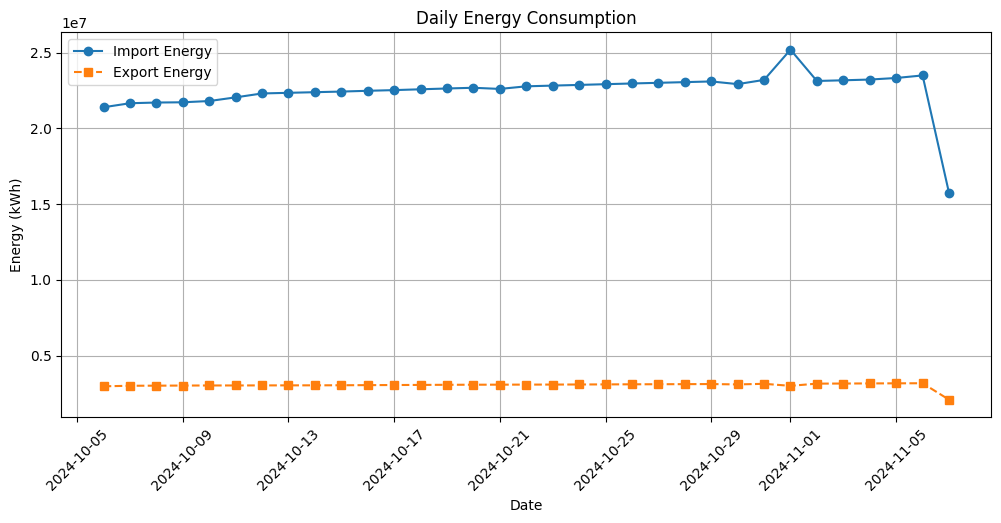

In [ ]:
import matplotlib.pyplot as plt

daily_energy = df.groupby('DATE')[['IMPORT_KWH (kWh)', 'EXPORT_KWH (kWh)']].sum()

plt.figure(figsize=(12, 5))
plt.plot(daily_energy.index, daily_energy['IMPORT_KWH (kWh)'], label='Import Energy', marker='o')
plt.plot(daily_energy.index, daily_energy['EXPORT_KWH (kWh)'], label='Export Energy', linestyle='dashed', marker='s')
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.title("Daily Energy Consumption")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
missing_values = df[['PHASE_A_INST._CURRENT (A)', 'PHASE_A_INST._VOLTAGE (V)',
                     'PHASE_B_INST._CURRENT (A)', 'PHASE_B_INST._VOLTAGE (V)',
                     'PHASE_C_INST._CURRENT (A)', 'PHASE_C_INST._VOLTAGE (V)']].isnull().sum()
print(missing_values)


PHASE_A_INST._CURRENT (A)     54664
PHASE_A_INST._VOLTAGE (V)     54664
PHASE_B_INST._CURRENT (A)    225156
PHASE_B_INST._VOLTAGE (V)    225156
PHASE_C_INST._CURRENT (A)    225156
PHASE_C_INST._VOLTAGE (V)    225156
dtype: int64


In [ ]:
df_phase_a = df[['DATE', 'TIME', 'WEEKDAY', 'DAY_OF_WEEK', 'AVG._IMPORT_KW (kW)','IMPORT_KWH (kWh)', 'AVG._EXPORT_KW (kW)','EXPORT_KWH (kWh)','AVG._IMPORT_KVA (kVA)','AVG._EXPORT_KVA (kVA)', 'PHASE_A_INST._CURRENT (A)', 'PHASE_A_INST._VOLTAGE (V)']]

print(df_phase_a.head())


        DATE      TIME  WEEKDAY DAY_OF_WEEK  AVG._IMPORT_KW (kW)  \
0 2024-11-07  23:45:00        3    Thursday               0.2860   
1 2024-11-07  23:30:00        3    Thursday               0.2908   
2 2024-11-07  23:15:00        3    Thursday               0.2627   
3 2024-11-07  23:00:00        3    Thursday               0.1828   
4 2024-11-07  22:45:00        3    Thursday               0.2509   

   IMPORT_KWH (kWh)  AVG._EXPORT_KW (kW)  EXPORT_KWH (kWh)  \
0          511.3600                  0.0               0.1   
1          511.2880                  0.0               0.1   
2          511.2151                  0.0               0.1   
3          511.1501                  0.0               0.1   
4          511.1040                  0.0               0.1   

   AVG._IMPORT_KVA (kVA)  AVG._EXPORT_KVA (kVA)  PHASE_A_INST._CURRENT (A)  \
0                 0.5163                    0.0                     2.2240   
1                 0.5251                    0.0               

In [ ]:
# Get all unique values
unique_dates = df['DATE'].unique()
unique_times = df['TIME'].unique()
unique_customers = df['CUSTOMER_REF'].unique()
unique_obis = df['OBIS'].unique()

# Print all unique values
print("Unique Dates:")
print(unique_dates)

print("\nUnique Times:")
print(unique_times)

print("\nUnique Customer References:")
print(unique_customers)

print("\nUnique OBIS Codes:")
print(unique_obis)


Unique Dates:
<DatetimeArray>
['2024-11-07 00:00:00', '2024-11-06 00:00:00', '2024-11-05 00:00:00',
 '2024-11-04 00:00:00', '2024-11-03 00:00:00', '2024-11-02 00:00:00',
 '2024-11-01 00:00:00', '2024-10-31 00:00:00', '2024-10-30 00:00:00',
 '2024-10-29 00:00:00', '2024-10-28 00:00:00', '2024-10-27 00:00:00',
 '2024-10-26 00:00:00', '2024-10-25 00:00:00', '2024-10-24 00:00:00',
 '2024-10-23 00:00:00', '2024-10-22 00:00:00', '2024-10-21 00:00:00',
 '2024-10-20 00:00:00', '2024-10-19 00:00:00', '2024-10-18 00:00:00',
 '2024-10-17 00:00:00', '2024-10-16 00:00:00', '2024-10-15 00:00:00',
 '2024-10-14 00:00:00', '2024-10-13 00:00:00', '2024-10-12 00:00:00',
 '2024-10-11 00:00:00', '2024-10-10 00:00:00', '2024-10-09 00:00:00',
 '2024-10-08 00:00:00', '2024-10-07 00:00:00', '2024-10-06 00:00:00']
Length: 33, dtype: datetime64[ns]

Unique Times:
[datetime.time(23, 45) datetime.time(23, 30) datetime.time(23, 15)
 datetime.time(23, 0) datetime.time(22, 45) datetime.time(22, 30)
 datetime.time(22,

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])  # Convert 'DATE' to datetime
df['MONTH'] = df['DATE'].dt.month  # Extract the month from the 'DATE' column

# Now create the subset with the new 'MONTH' column
df_phase_a2 = df[['DATE', 'TIME', 'WEEKDAY', 'DAY_OF_WEEK', 'AVG._IMPORT_KW (kW)',
                 'IMPORT_KWH (kWh)', 'AVG._EXPORT_KW (kW)', 'EXPORT_KWH (kWh)',
                 'AVG._IMPORT_KVA (kVA)', 'AVG._EXPORT_KVA (kVA)',
                 'PHASE_A_INST._CURRENT (A)', 'PHASE_A_INST._VOLTAGE (V)', 'MONTH']]



In [ ]:
import datetime

In [ ]:
# # Function to map the closest time block
# def get_time_block(time):
#     closest_time = min(unique_times, key=lambda x: abs(datetime.datetime.combine(datetime.date.today(), x) - datetime.datetime.combine(datetime.date.today(), time)))
#     return closest_time

# # Create a new 'TIME_BLOCK' column
# df_phase_a2['TIME_BLOCK'] = df_phase_a2['TIME'].apply(get_time_block)

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'TIME' column is already in datetime.time format.

# Function to determine the time block (1 for 00:00 to 01:00, 2 for 01:00 to 02:00, etc.)
def get_time_block_categ(time):
    return time.hour % 24 + 1  # This will map hour 00 to block 1, hour 01 to block 2, etc.

# Create a new 'TIME_BLOCK' column based on the 'TIME' column
df_phase_a2['TIME_BLOCK_24'] = df_phase_a2['TIME'].apply(get_time_block_categ)

# Print the DataFrame with the new 'TIME_BLOCK' column
print(df_phase_a2.head())


        DATE      TIME  WEEKDAY DAY_OF_WEEK  AVG._IMPORT_KW (kW)  \
0 2024-11-07  23:45:00        3    Thursday               0.2860   
1 2024-11-07  23:30:00        3    Thursday               0.2908   
2 2024-11-07  23:15:00        3    Thursday               0.2627   
3 2024-11-07  23:00:00        3    Thursday               0.1828   
4 2024-11-07  22:45:00        3    Thursday               0.2509   

   IMPORT_KWH (kWh)  AVG._EXPORT_KW (kW)  EXPORT_KWH (kWh)  \
0          511.3600                  0.0               0.1   
1          511.2880                  0.0               0.1   
2          511.2151                  0.0               0.1   
3          511.1501                  0.0               0.1   
4          511.1040                  0.0               0.1   

   AVG._IMPORT_KVA (kVA)  AVG._EXPORT_KVA (kVA)  PHASE_A_INST._CURRENT (A)  \
0                 0.5163                    0.0                     2.2240   
1                 0.5251                    0.0               

<ipython-input-15-056ecdf9acef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phase_a2['TIME_BLOCK_24'] = df_phase_a2['TIME'].apply(get_time_block_categ)


 Heatmap for Hourly Patterns Across Days
This plot will give you a heatmap of energy consumption patterns across different hours of the day and days of the week.

<ipython-input-16-2f0d8edaaec6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phase_a2['HOUR'] = df_phase_a2['TIME'].apply(lambda x: x.hour)


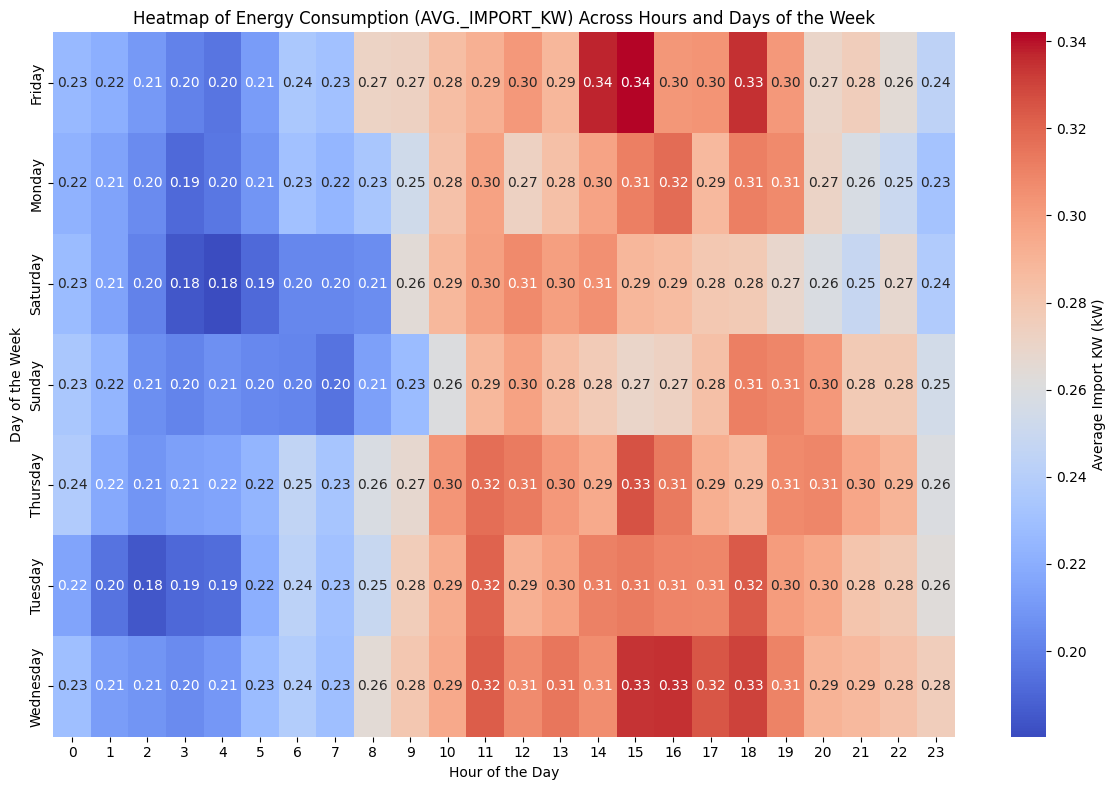

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for the hour of the day
df_phase_a2['HOUR'] = df_phase_a2['TIME'].apply(lambda x: x.hour)

# Pivot the DataFrame to create a matrix of days vs hours
pivot = df_phase_a2.pivot_table(index='DAY_OF_WEEK', columns='HOUR', values='AVG._IMPORT_KW (kW)', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Average Import KW (kW)'})
plt.title('Heatmap of Energy Consumption (AVG._IMPORT_KW) Across Hours and Days of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()


Time Series Plot for Energy Consumption Over Time. A time series plot can show how energy consumption varies over time, helping you identify trends and anomalies.

<Figure size 1200x600 with 0 Axes>

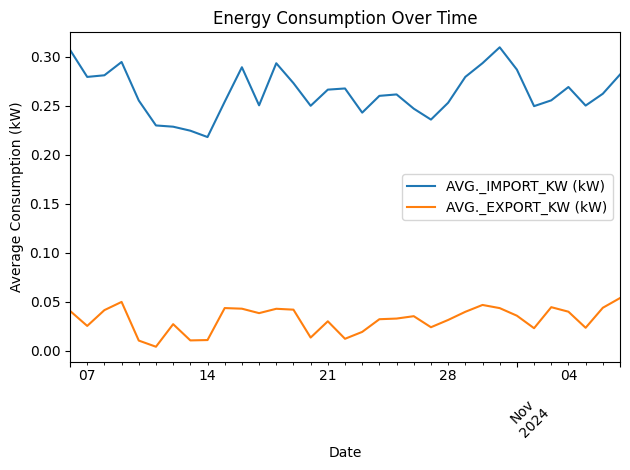

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting the average energy consumption over time (all dates)
df_phase_a2.groupby('DATE').agg({'AVG._IMPORT_KW (kW)': 'mean', 'AVG._EXPORT_KW (kW)': 'mean'}).plot()

plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Average Consumption (kW)')
plt.legend(['AVG._IMPORT_KW (kW)', 'AVG._EXPORT_KW (kW)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Boxplot to Visualize Distribution by Time Block
A boxplot can help you visualize the distribution of energy consumption for each time block. This will give insights into the spread and outliers.

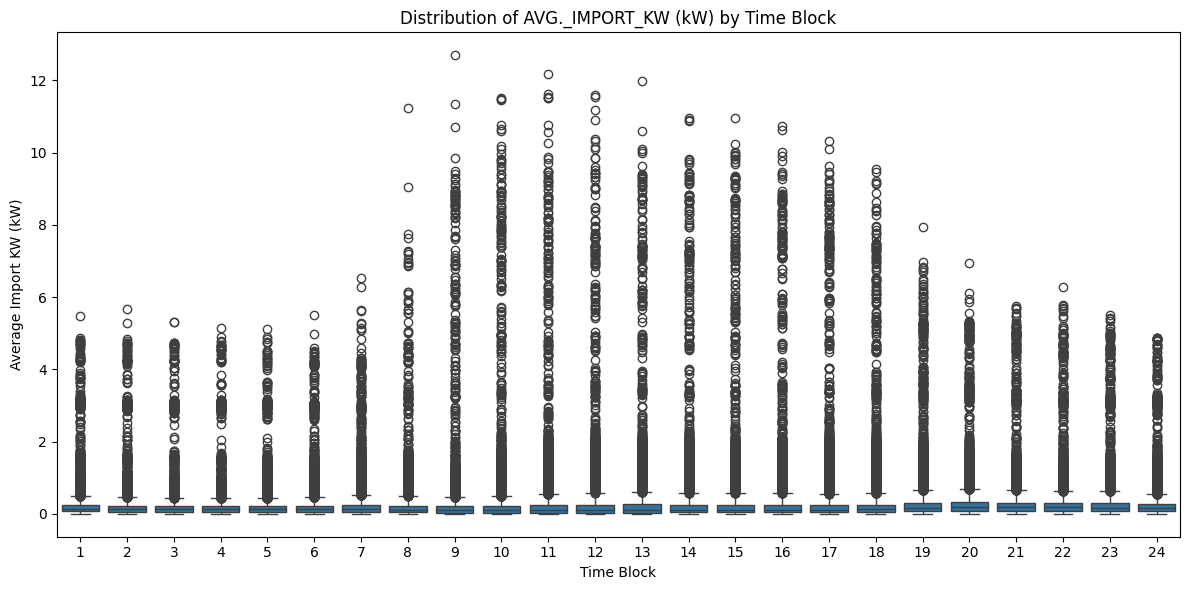

In [ ]:
plt.figure(figsize=(12, 6))

# Create boxplots to visualize the distribution of energy consumption for each time block
sns.boxplot(x='TIME_BLOCK_24', y='AVG._IMPORT_KW (kW)', data=df_phase_a2)
plt.title('Distribution of AVG._IMPORT_KW (kW) by Time Block')
plt.xlabel('Time Block')
plt.ylabel('Average Import KW (kW)')
plt.tight_layout()
plt.show()


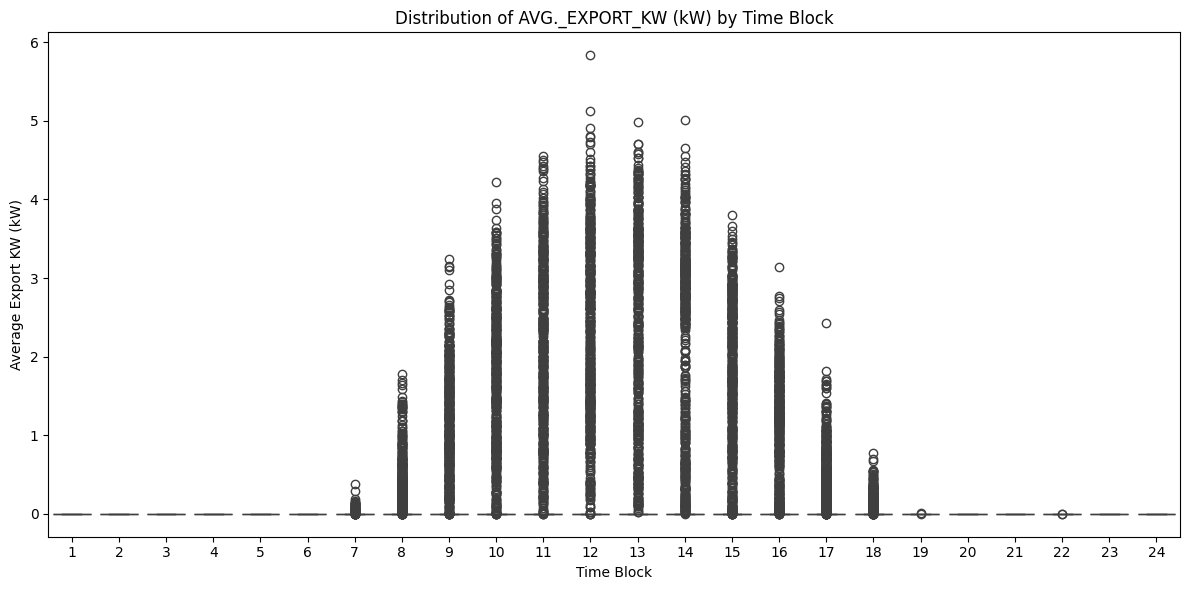

In [ ]:
plt.figure(figsize=(12, 6))

# Create boxplots to visualize the distribution of energy consumption for each time block
sns.boxplot(x='TIME_BLOCK_24', y='AVG._EXPORT_KW (kW)', data=df_phase_a2)
plt.title('Distribution of AVG._EXPORT_KW (kW) by Time Block')
plt.xlabel('Time Block')
plt.ylabel('Average Export KW (kW)')
plt.tight_layout()
plt.show()


A pair plot (or scatter plot matrix) helps visualize relationships between multiple variables and identify potential correlations

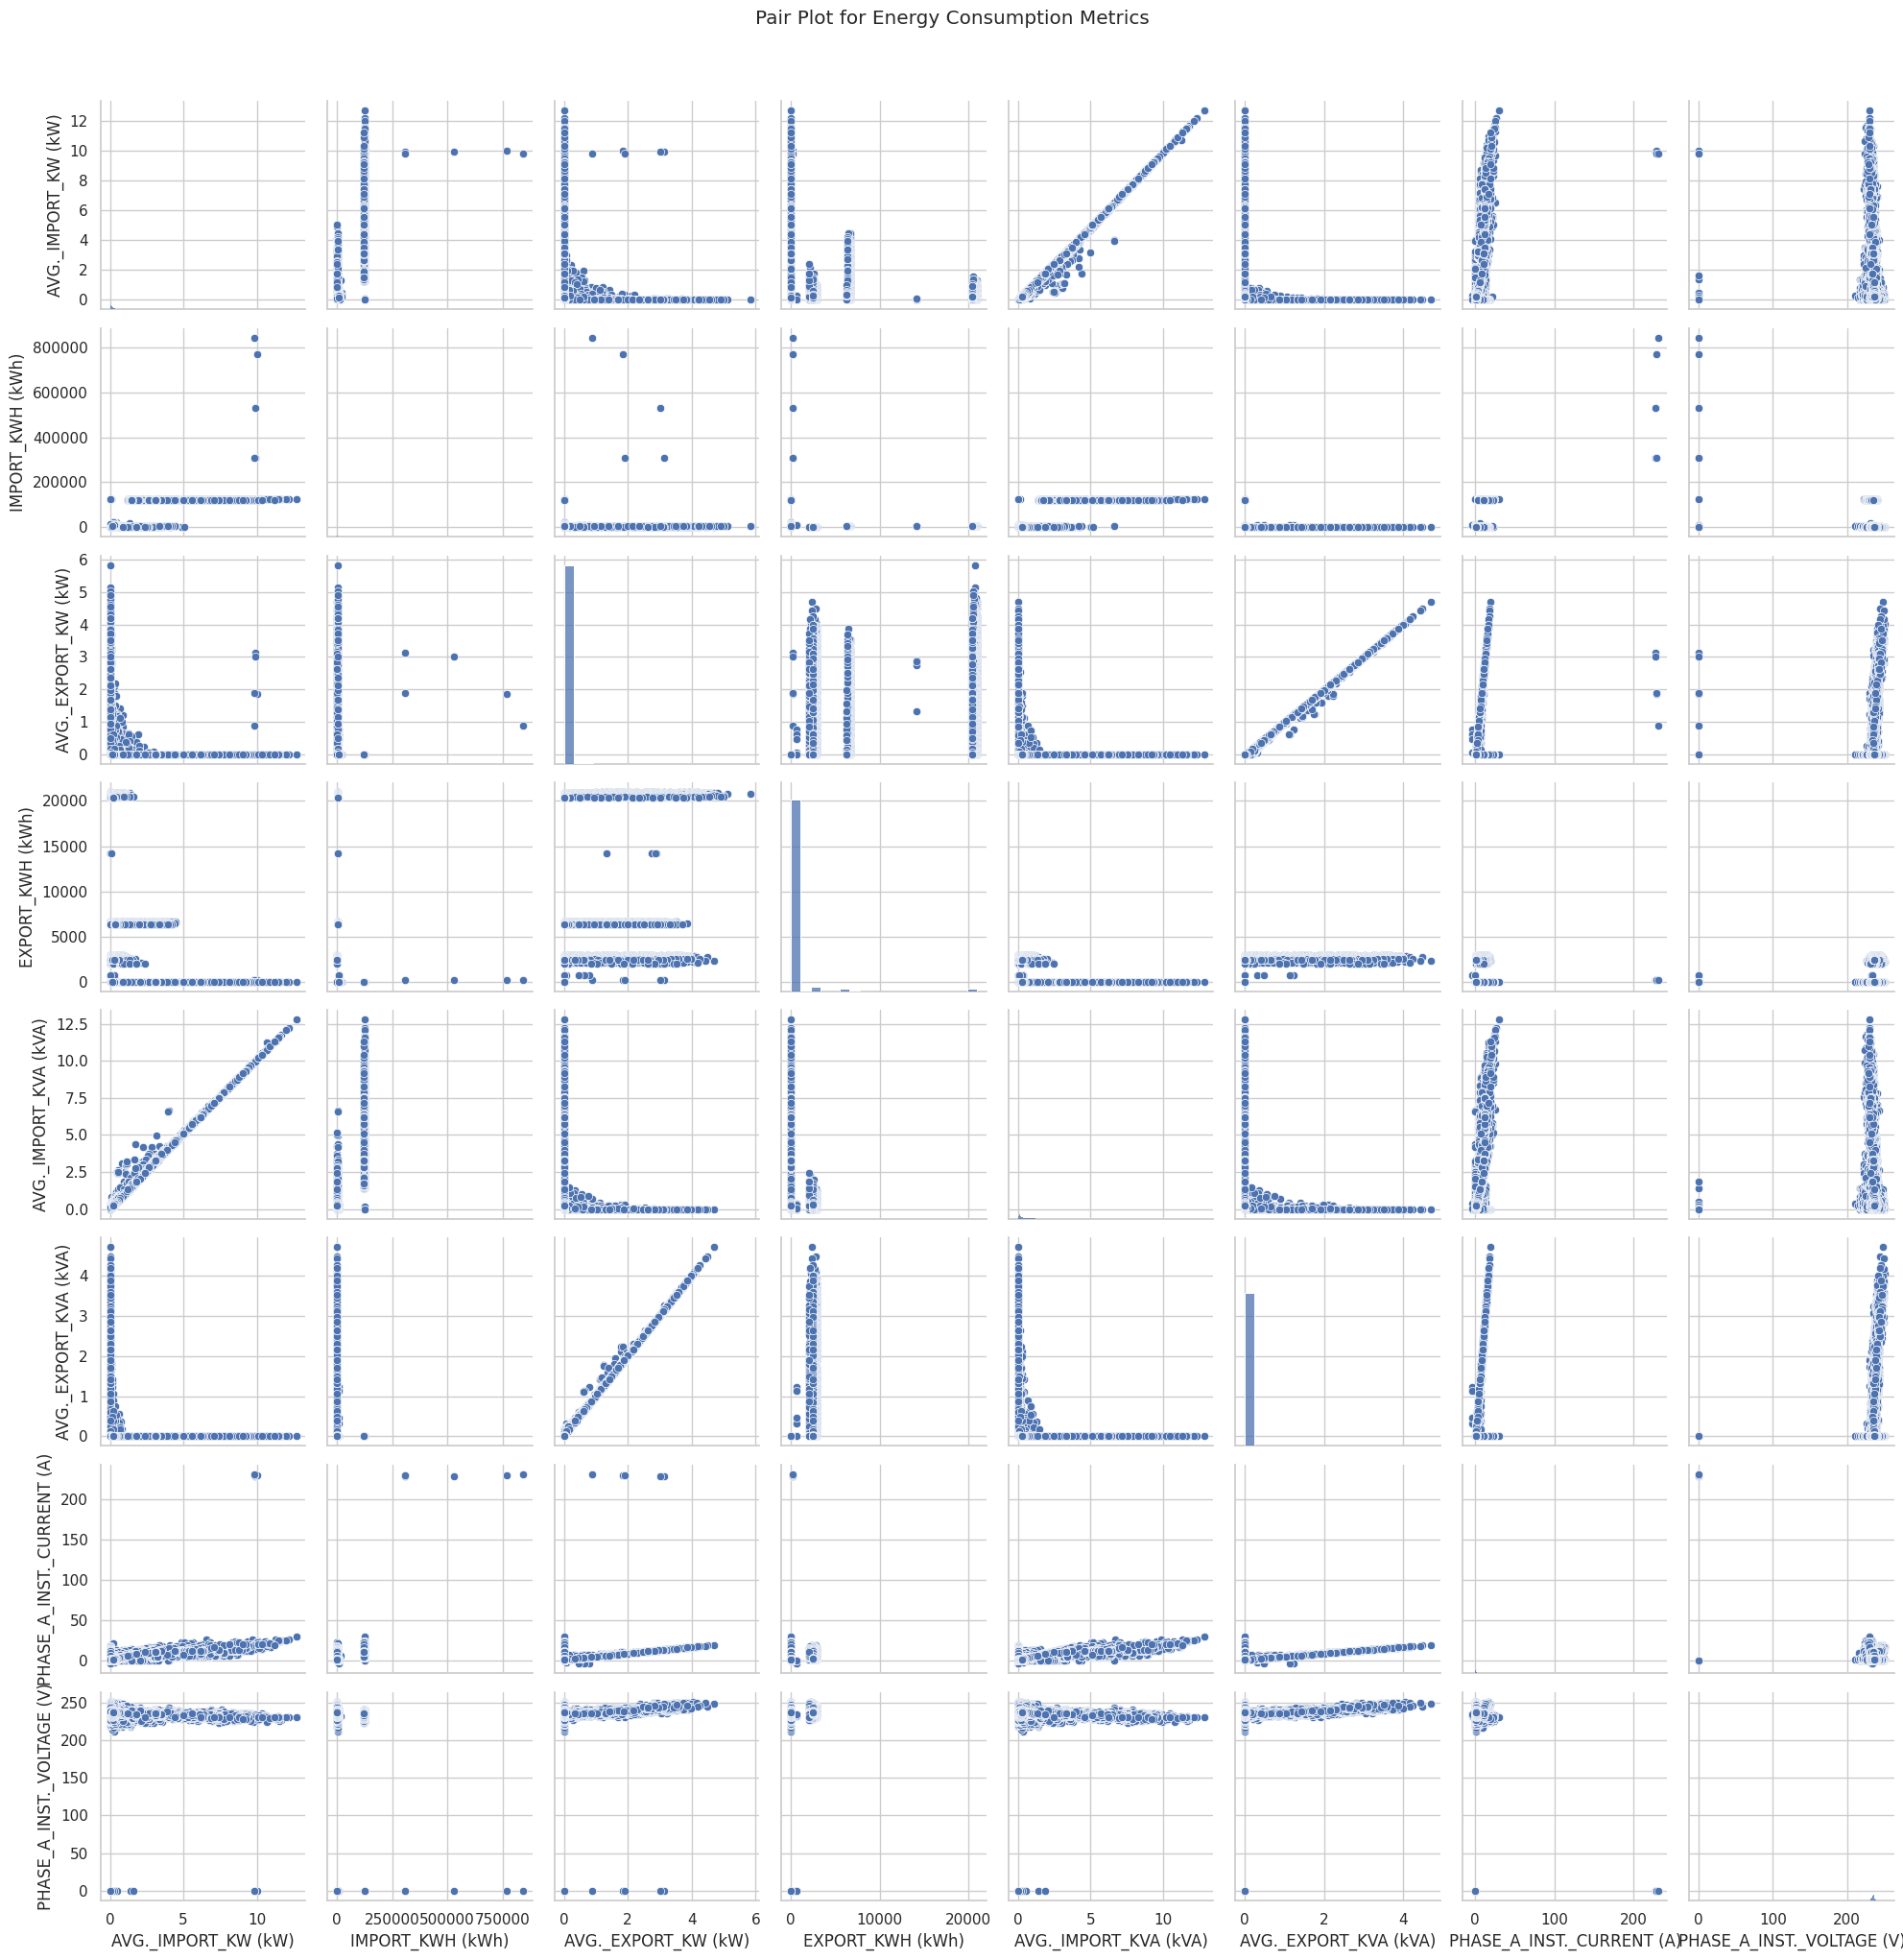

In [ ]:
# Select a subset of numerical columns to plot
columns_to_plot = ['AVG._IMPORT_KW (kW)', 'IMPORT_KWH (kWh)', 'AVG._EXPORT_KW (kW)', 'EXPORT_KWH (kWh)',
                   'AVG._IMPORT_KVA (kVA)', 'AVG._EXPORT_KVA (kVA)', 'PHASE_A_INST._CURRENT (A)', 'PHASE_A_INST._VOLTAGE (V)']

# Create pairplot to visualize correlations
sns.pairplot(df_phase_a2[columns_to_plot])
plt.suptitle('Pair Plot for Energy Consumption Metrics', y=1.02)
plt.tight_layout()
plt.show()


A stacked area plot can help you understand how different energy consumption metrics contribute over time.

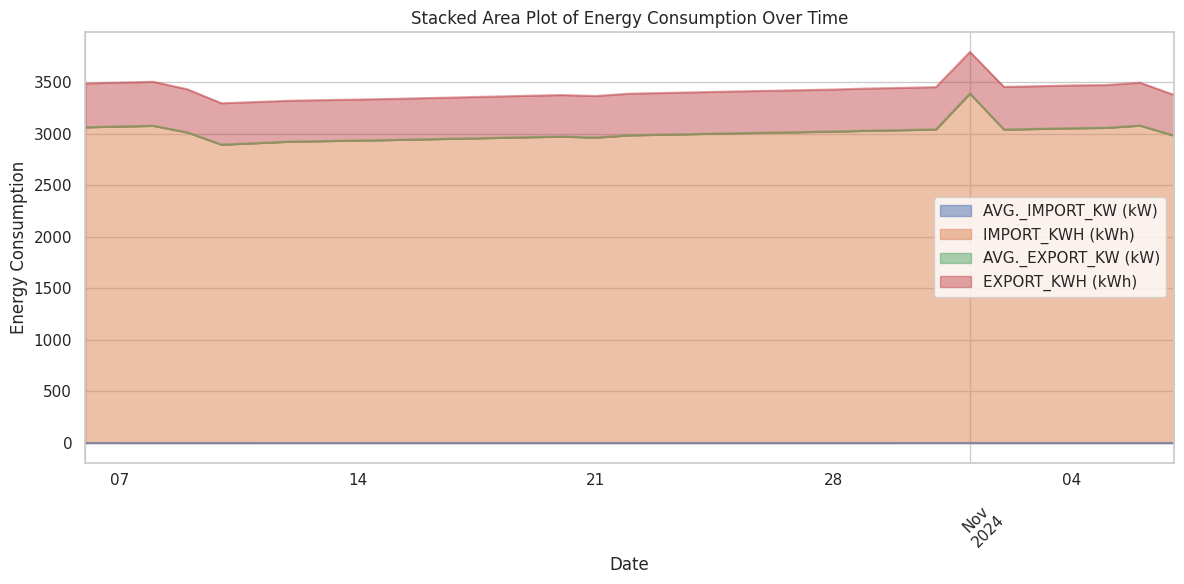

In [ ]:
# Aggregating by date for stacked area plot
df_grouped_by_date = df_phase_a2.groupby('DATE').agg({'AVG._IMPORT_KW (kW)': 'mean', 'IMPORT_KWH (kWh)': 'mean',
                                             'AVG._EXPORT_KW (kW)': 'mean', 'EXPORT_KWH (kWh)': 'mean'})

# Plotting stacked area plot
df_grouped_by_date.plot(kind='area', figsize=(12, 6), stacked=True, alpha=0.5)
plt.title('Stacked Area Plot of Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bar Plot for Energy Consumption by Month
If you're interested in the overall energy consumption pattern for each month, you can aggregate data by the month and then plot it.

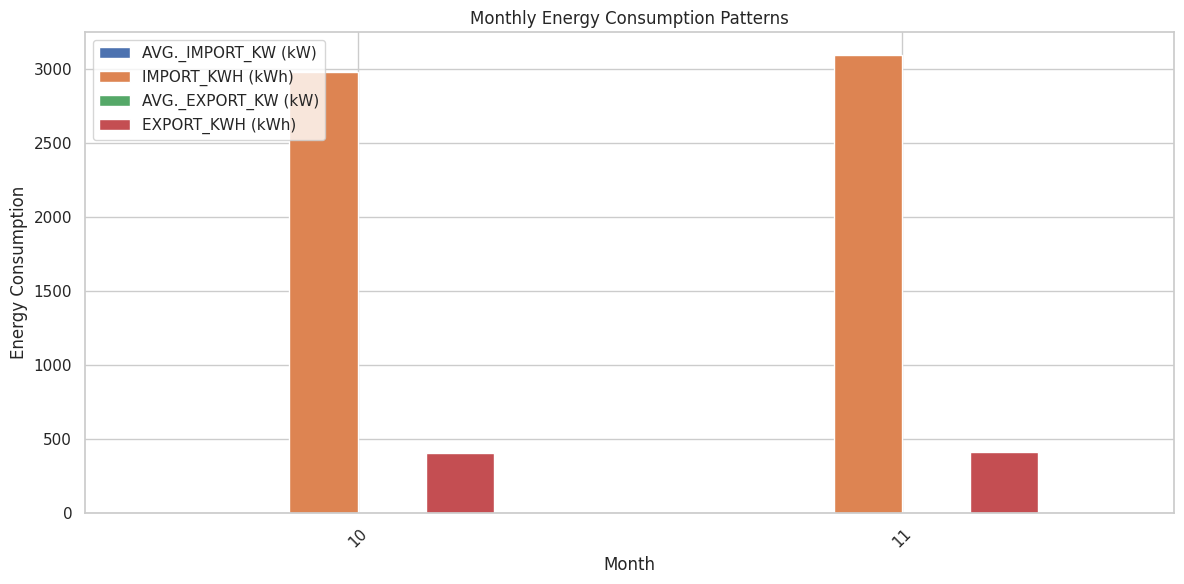

In [ ]:
# Aggregating data by month for a bar plot
df_monthly = df_phase_a2.groupby('MONTH').agg({'AVG._IMPORT_KW (kW)': 'mean', 'IMPORT_KWH (kWh)': 'mean',
                                      'AVG._EXPORT_KW (kW)': 'mean', 'EXPORT_KWH (kWh)': 'mean'})

# Plotting the bar plot for each month
df_monthly.plot(kind='bar', figsize=(12, 6), stacked=False)
plt.title('Monthly Energy Consumption Patterns')
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Violin Plot to Visualize Distribution by Day of Week
Violin plots combine aspects of boxplots and density plots, and they can provide more insights into the distribution of energy consumption metrics.

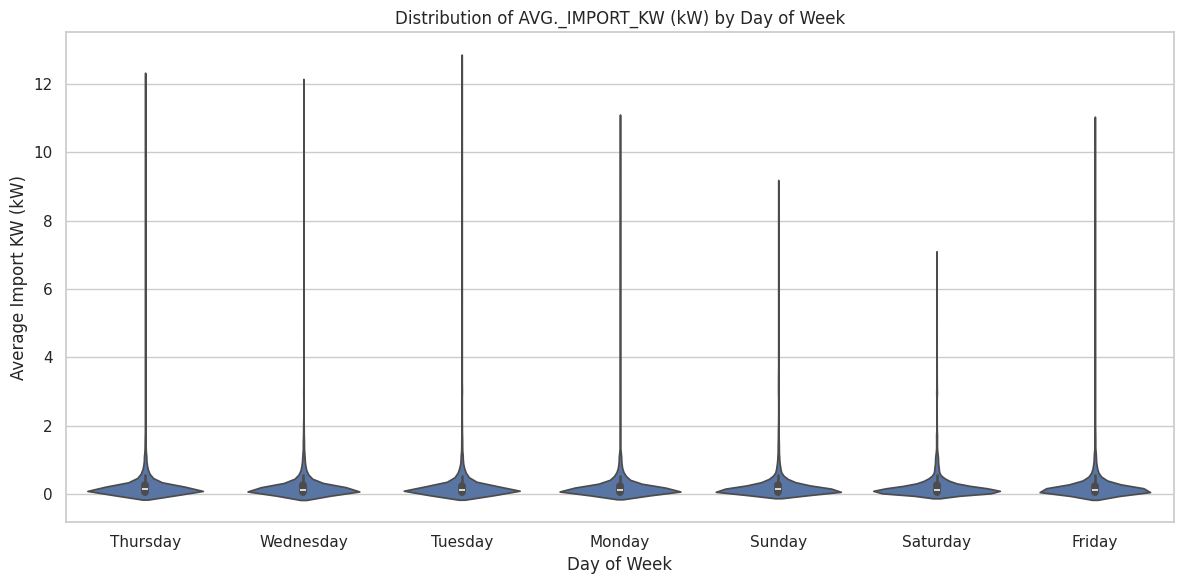

In [ ]:
plt.figure(figsize=(12, 6))

# Violin plot for distribution of AVG._IMPORT_KW (kW) by day of week
sns.violinplot(x='DAY_OF_WEEK', y='AVG._IMPORT_KW (kW)', data=df_phase_a2)
plt.title('Distribution of AVG._IMPORT_KW (kW) by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Import KW (kW)')
plt.tight_layout()
plt.show()


Correlation Heatmap
A correlation heatmap is useful for understanding how different energy consumption metrics are related to each other.

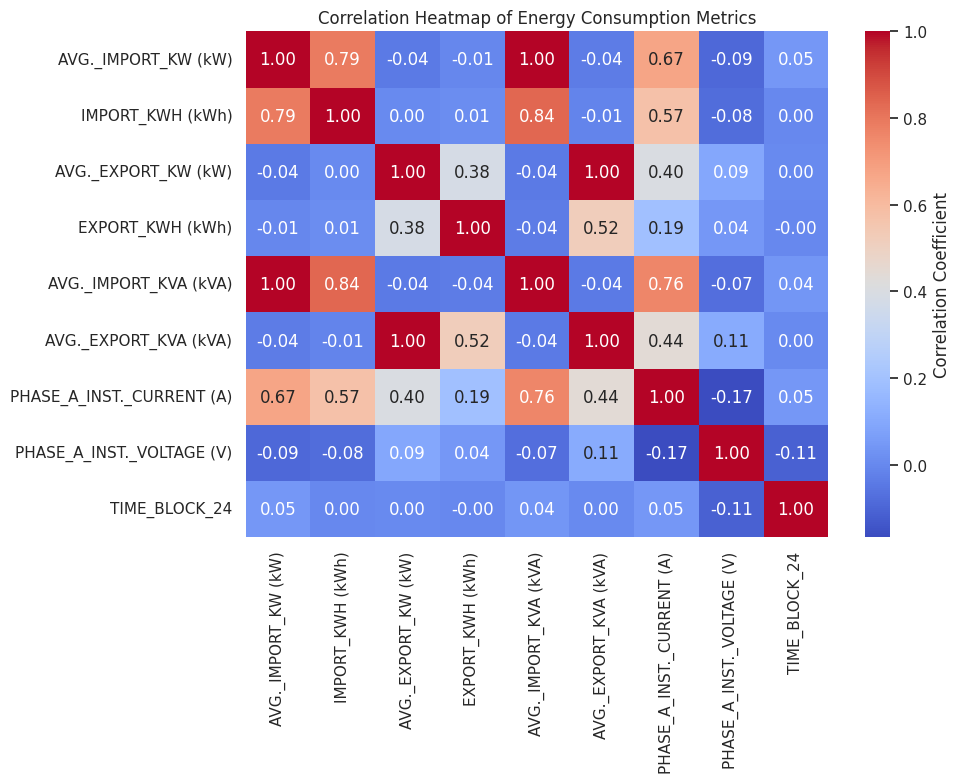

In [ ]:
# Calculating correlation matrix for the selected numerical columns
correlation_matrix = df_phase_a2[['AVG._IMPORT_KW (kW)', 'IMPORT_KWH (kWh)', 'AVG._EXPORT_KW (kW)', 'EXPORT_KWH (kWh)',
                         'AVG._IMPORT_KVA (kVA)', 'AVG._EXPORT_KVA (kVA)', 'PHASE_A_INST._CURRENT (A)', 'PHASE_A_INST._VOLTAGE (V)','TIME_BLOCK_24']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Energy Consumption Metrics')
plt.tight_layout()
plt.show()


<ipython-input-49-cbfd90123633>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])
<ipython-input-49-cbfd90123633>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['DATE'].dt.month
<ipython-input-49-cbfd90123633>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

<Figure size 2000x800 with 0 Axes>

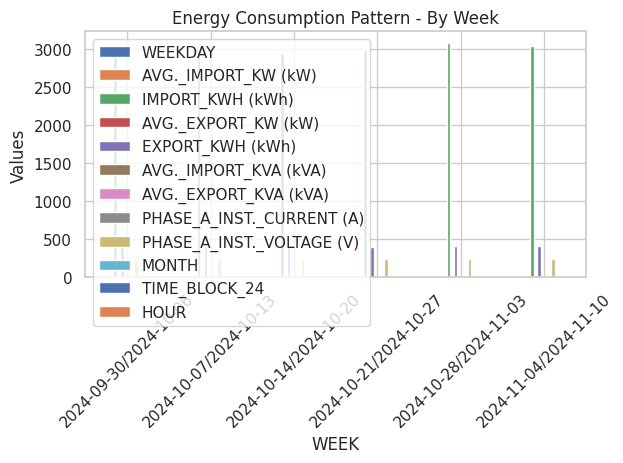

<Figure size 2000x800 with 0 Axes>

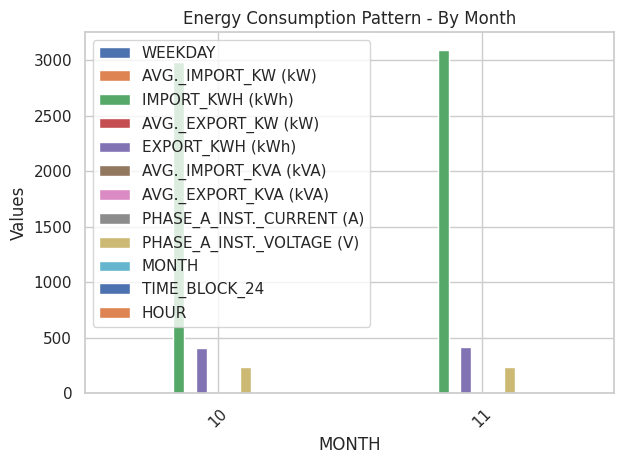

<Figure size 2000x800 with 0 Axes>

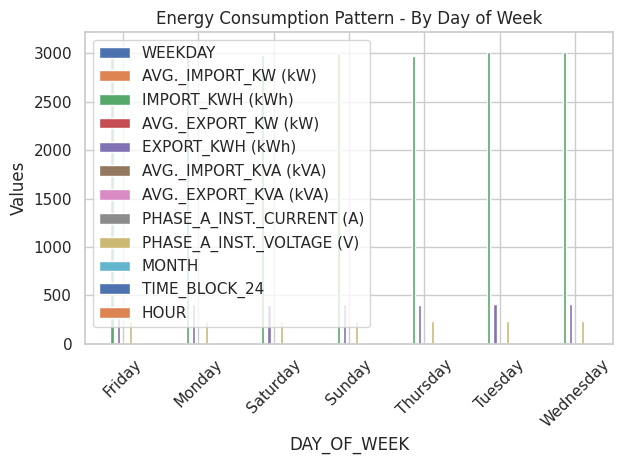

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the plotting style
sns.set(style="whitegrid")

# Ensure categorical columns are properly formatted
def preprocess_data(df):
    # Convert DATE to datetime format if not already
    if 'DATE' in df.columns:
        df['DATE'] = pd.to_datetime(df['DATE'])

    # Extract month and day of the week if applicable
    if 'DATE' in df.columns:
        df['MONTH'] = df['DATE'].dt.month
        df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

    # Convert TIME_BLOCK to a numeric representation if it's in datetime or string format
    if 'TIME_BLOCK' in df.columns and df['TIME_BLOCK'].dtype == 'object':
        df['TIME_BLOCK'] = df['TIME_BLOCK'].astype(str)
    elif 'TIME_BLOCK' in df.columns and pd.api.types.is_time_dtype(df['TIME_BLOCK']):
        df['TIME_BLOCK'] = df['TIME_BLOCK'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

    return df

# Function to plot energy consumption patterns for a given category
def plot_energy_consumption(df, category_column, title):
    # Ensure only numeric columns are aggregated
    numeric_cols = df.select_dtypes(include=['number']).columns

    if category_column not in df.columns:
        print(f"Column '{category_column}' not found in the dataset.")
        return

    aggregated_data = df.groupby(category_column)[numeric_cols].mean()

    # Check if there is any data to plot
    if aggregated_data.empty:
        print(f"No numeric data available for {category_column}.")
        return

    # Plotting
    plt.figure(figsize=(20, 8))  # Larger figure size for better visibility
    aggregated_data.plot(kind='bar', stacked=False)

    # Adjust x-axis labels to avoid clutter
    plt.xticks(ticks=range(0, len(aggregated_data.index), max(1, len(aggregated_data.index) // 10)), rotation=45)

    plt.title(title)
    plt.xlabel(category_column)
    plt.ylabel('Values')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Preprocess the dataset
df_phase_a2 = preprocess_data(df_phase_a2)

# Aggregate by week instead of date to improve visualization
df_phase_a2['WEEK'] = df_phase_a2['DATE'].dt.to_period('W')

# Generate plots
plot_energy_consumption(df_phase_a2, 'WEEK', 'Energy Consumption Pattern - By Week')
plot_energy_consumption(df_phase_a2, 'MONTH', 'Energy Consumption Pattern - By Month')
plot_energy_consumption(df_phase_a2, 'DAY_OF_WEEK', 'Energy Consumption Pattern - By Day of Week')



In [ ]:
import matplotlib.pyplot as plt

# Assuming df_grouped_by_date is already created
df_grouped_by_date.plot(kind='area', figsize=(12, 6), stacked=True, alpha=0.5)
plt.title('Stacked Area Chart of Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_monthly = df.groupby(df['DATE'].dt.month).agg({'AVG._IMPORT_KW (kW)': 'mean', 'IMPORT_KWH (kWh)': 'mean'})
df_monthly.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()